# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,2,4,59.4,61.0,338,4.00,4.05,2.39


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [5]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540265
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702667
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
#your comments here
#when looking at the mean and the std, seems that price is very variable. This is confirmed by min and max values.
#looks like deph has the less variability, followed by table. 
#color and clarity could be connected, but when I check top and tail after sorting table by price, it's not obvious.
#smaller diamonds seems more frequent around smaller prices, and vice versa.

diamonds[diamonds['price']>18800]


,carat,cut,color,clarity,depth,table,price,x,y,z
27745,2.00,Very Good,2,2,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,3,1,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,3,7,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,3,2,63.5,56.0,18818,7.90,7.97,5.04
27749,2.29,Premium,1,3,60.8,60.0,18823,8.50,8.47,5.16


In [18]:
diamonds[diamonds['price']<340]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,2,4,59.4,61.0,338,4.00,4.05,2.39


Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here
#Carat affect prices. When the first increases, the second also increases.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [21]:
#your code here
diamonds.groupby('color').mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.984776,5.986256,3.699147
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507966
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.465938
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here
#the 'higher' the color, the lower the carat. And also de lower the price.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

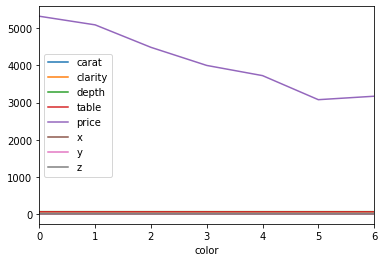

In [23]:
#your code here
diamonds.groupby('color').mean().plot()

In [ ]:
#your comments here
#price decreases.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [27]:
#your code here
diamonds.groupby('carat').mean().sort_values( by = 'price', ascending = False)

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
3.51,0.000000,3.000000,62.500000,59.000000,18701.000000,9.660000,9.630000,6.030000
2.67,4.000000,1.000000,63.800000,58.000000,18686.000000,8.690000,8.640000,5.540000
4.50,0.000000,0.000000,65.800000,58.000000,18531.000000,10.230000,10.160000,6.720000
5.01,0.000000,0.000000,65.500000,59.000000,18018.000000,10.740000,10.540000,6.980000
2.57,3.666667,1.333333,61.066667,58.666667,17841.666667,8.860000,8.773333,5.383333
...,...,...,...,...,...,...,...,...
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000


In [ ]:
#your comments
#It's not a perfect relation, but carat and price seems related, maybe affected by something else, like color.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

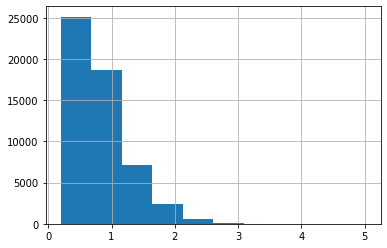

In [31]:
#your code here
diamonds['carat'].hist()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [49]:
#your code here
diamonds.groupby('table').mean()
#how can I bid the values of 'table', so I don't have to check number by number?



,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [ ]:
#your comments here
#I can't tell. No relation apparently.

**Finally, do the same with the `clarity` column.**

In [50]:
#your code here
diamonds.groupby('clarity').mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224688
1,1.077648,3.469980,61.772167,57.927181,5063.028606,6.404157,6.399914,3.952642
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763935,3.494208,61.724417,57.417401,3924.989395,5.658633,5.659782,3.492788
4,0.727158,3.161792,61.667458,57.315151,3839.455391,5.572860,5.582512,3.441428
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503321,3.351573,61.624651,56.884460,2523.114637,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


In [ ]:
#your comments here
#could be connected with size (x,y,z)

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here
#I still think it will be 'carat'. 

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


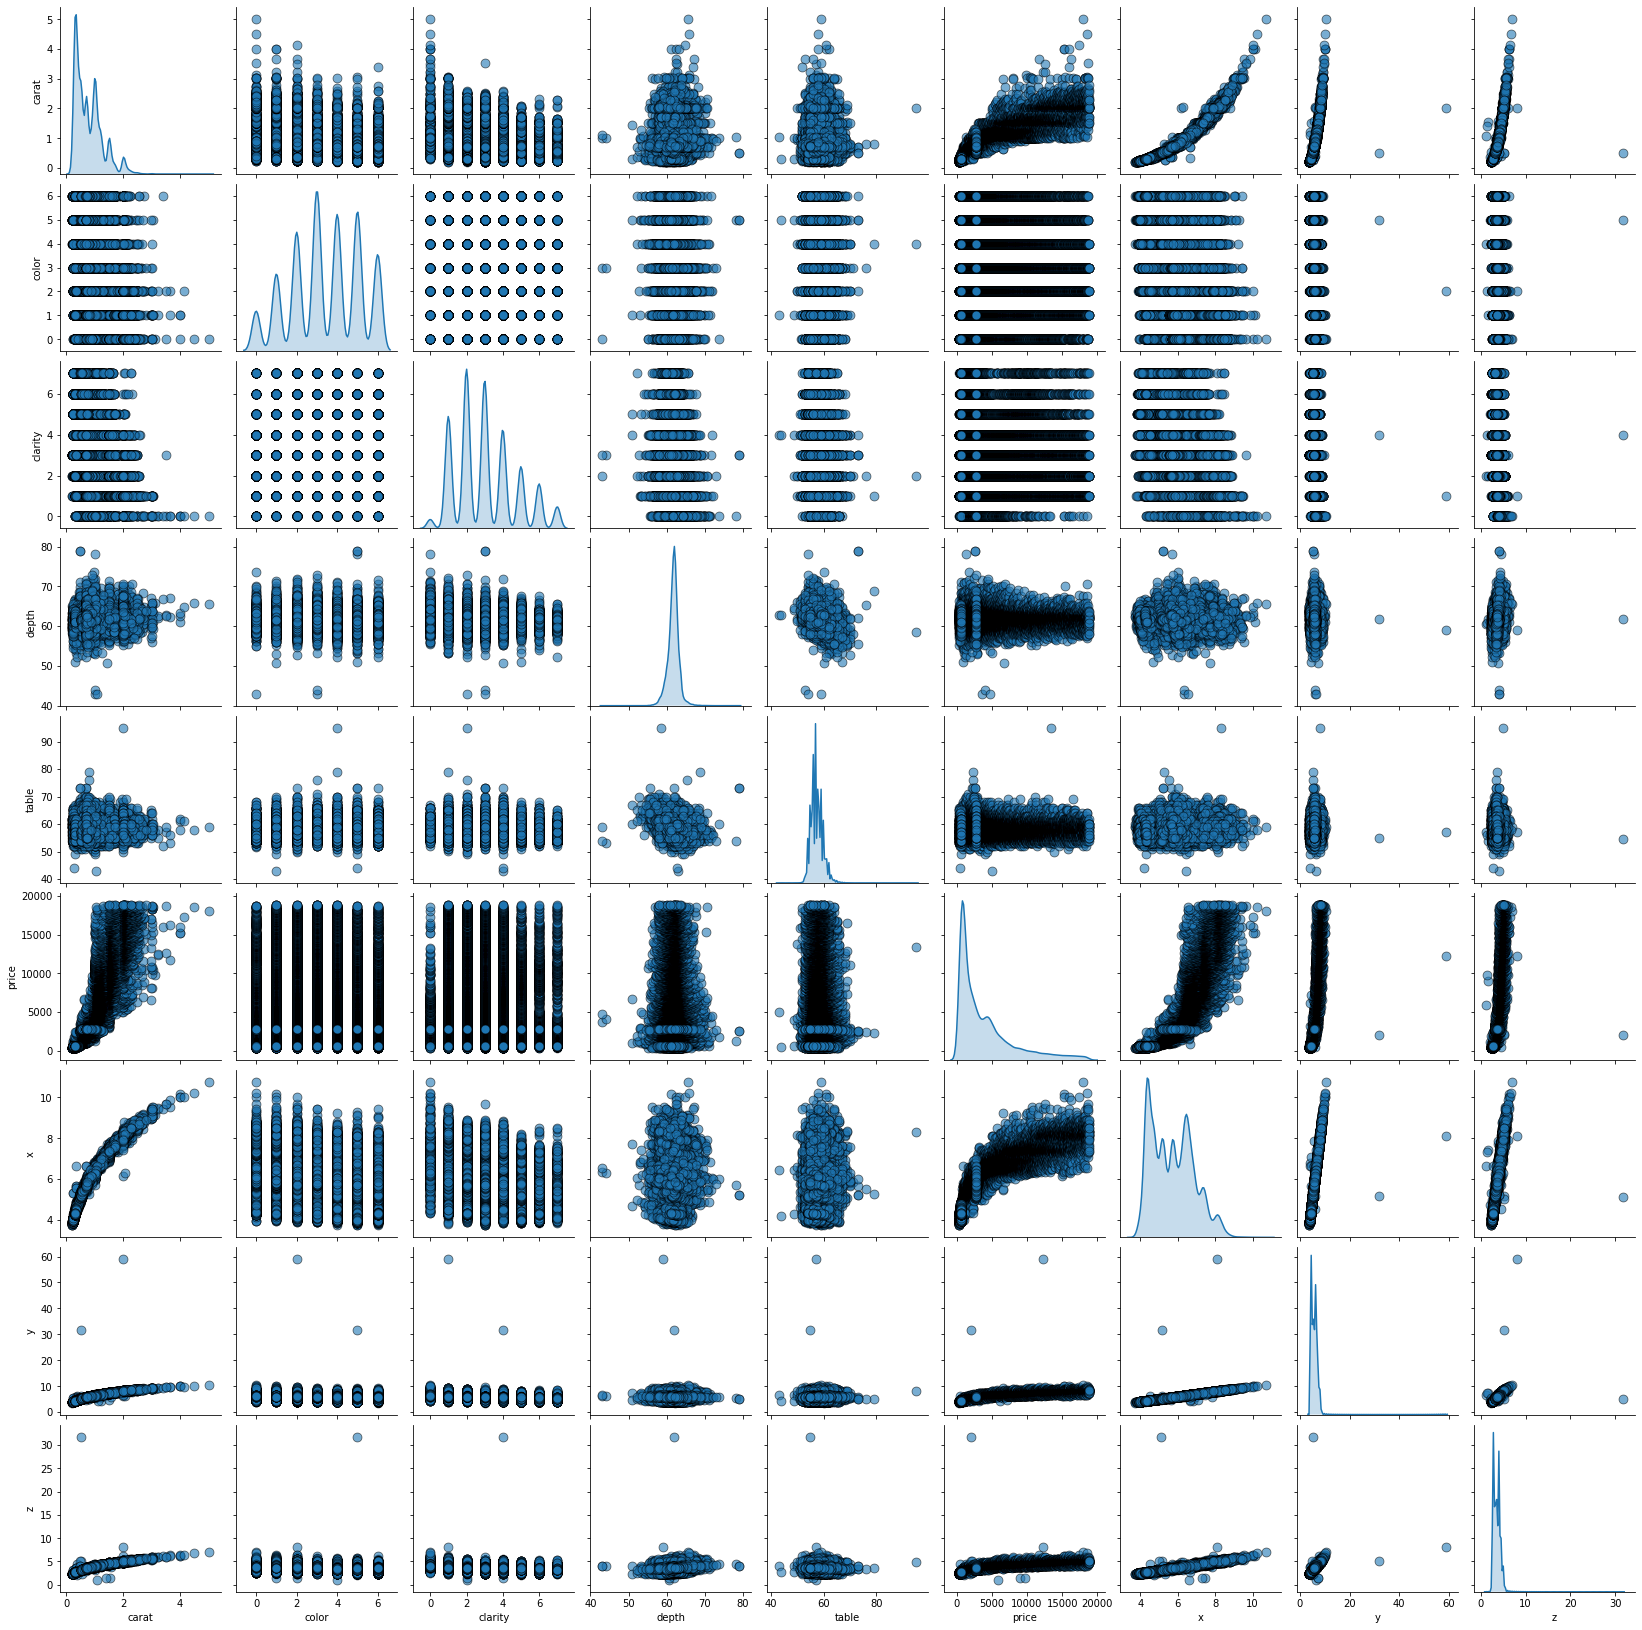

In [52]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
#price and x, x and carat.
#price and carat.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

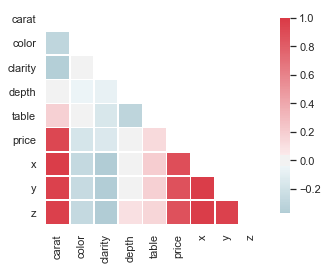

In [57]:
# your code here
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = diamonds.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

**What do you see here? Regarding the results before, does it fit with them?**

In [59]:
diamonds.corr()


,carat,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.977765,0.953989,0.961049
color,-0.291437,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270780,-0.264018,-0.270112
clarity,-0.352841,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.373009,-0.359168,-0.370374
depth,0.028224,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025097,-0.029142,0.094949
table,0.181618,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.196130,0.184519,0.152524
price,0.921591,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.887227,0.867870,0.868229
x,0.977765,-0.270780,-0.373009,-0.025097,0.196130,0.887227,1.000000,0.974933,0.975445
y,0.953989,-0.264018,-0.359168,-0.029142,0.184519,0.867870,0.974933,1.000000,0.956765
z,0.961049,-0.270112,-0.370374,0.094949,0.152524,0.868229,0.975445,0.956765,1.000000


In [58]:
#your thoughts here
#Carrat is very correlated to price, but price is also correlated with the size of the diamond.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

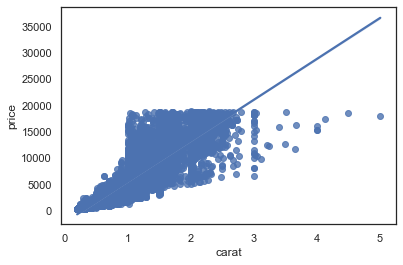

In [62]:
# your code here
#price and carat (weight)
import scipy as sp

sns.regplot(x="carat", y="price", data=diamonds);

**What do you think?**

In [ ]:
#your thoughts here
#I can see the correlation
#I see a "cealing" for price
#I wonder if I cleaned the outliers properly.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
#I would compare this dataframe with the original one.

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.